#  **Classification** with the **Titanic** Dataset - Survival Prediction

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the Titanic sank after hitting an iceberg, resulting in the deaths of over 1,500 passengers and crew. This project attempts to predict whether a given passenger survived or not using machine learning algorithms.

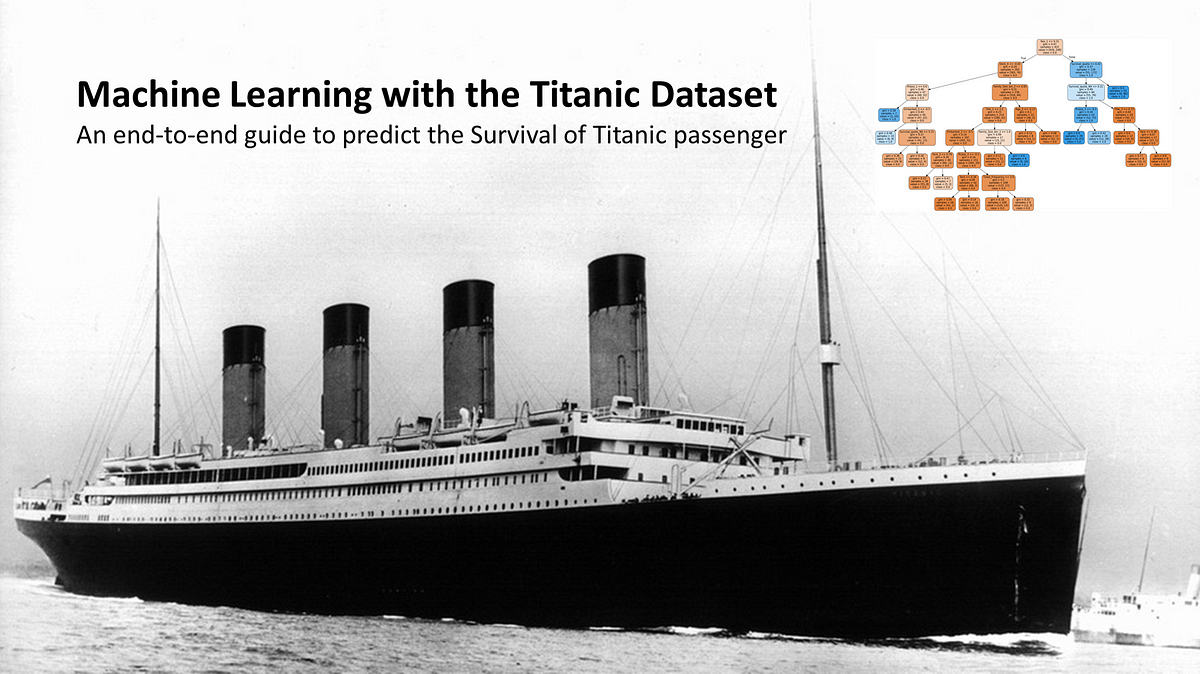

The project follows a structured workflow:

1. Data Collection and Overview: In this initial step, I gather the Titanic dataset, which contains information about passengers such as their age, gender, class, and whether they survived or not. We start by loading and inspecting the dataset to get a high-level understanding of its structure and content.

2. Data Preprocessing and Cleaning: Data preprocessing is crucial for preparing the dataset for modeling. This step involves handling missing values, dealing with outliers, and converting categorical variables into numerical format. Data cleaning ensures that the dataset is ready for analysis and modeling.

3. Exploratory Data Analysis (EDA): EDA is an essential part of any data analysis project. It involves visualizing and understanding the dataset's characteristics, exploring relationships between variables, and identifying patterns or trends. EDA provides valuable insights that guide feature engineering and model selection.

4. Feature Engineering: Feature engineering focuses on creating new features or modifying existing ones to improve the predictive power of the model. In this project, we generate meaningful features from the dataset, which can include creating age groups, extracting titles from names, and encoding categorical variables.

5. Model Selection and Training: With the preprocessed dataset and engineered features, we proceed to select machine learning models for classification. We split the data into training and testing sets, train various models (e.g., logistic regression, decision trees, random forests), and evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

6. Model Evaluation and Performance Metrics: This step involves a detailed evaluation of the selected models. We assess their performance on the test data and compare them using various evaluation metrics. Additionally, we may perform hyperparameter tuning to optimize the models.

7. Conclusion and Results: In the final step, we summarize the results of the classification models. We may provide insights into which features were most important for prediction and discuss the strengths and weaknesses of the chosen models. The conclusion provides an overall assessment of the project's success and any future directions for improvement.

---
Source/Links:
+ [Kaggle Competition - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)  
+ [Youtube Tutorial - Titanic Classification](https://youtu.be/2fExV5KHU9s?si=xfws-BJxljN5kn2D)  
+ [Towards DataScience Blog - Machine Learning with the Titanic Dataset](https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280)

History:
+ v1 May 2024, dbe --- initial version for BINA FS24
---

### Importing the libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### 1) Data Collection

In [ ]:
FILEpath = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB09-Clustering%2BClassification/Python/"
FILEname = "SampleData_Titanic.csv"

titanic_data = pd.read_csv(FILEpath+FILEname)

titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Dictionary

    Variable     Definition             Key
    
    Survived     Survival               0 = No, 1 = Yes
    pclass       Ticket class           1 = 1st, 2 = 2nd, 3 = 3rd
    sex          Sex  
    Age          Age in Years
    sibsp        # of sibilings/spouses aboard the Titanic
    parch        # of parents/children aboard the Titanic
    ticket       Ticket number
    fare         Passenger fare
    cabin        Cabin number
    embarked     Port of Embarkation  
                 C = Cherbourg, Q = Queentown, S = Southampton

### 2) Data Preprocessing

In [ ]:
#  Number of rows and columns
titanic_data.shape

(891, 12)

In [ ]:
# Get information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# To check the number of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the missing values

If the null value is more than 30% then drop the column. Else, Just impute the column with mean.

In [ ]:
# Dropping the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Replacing the missing vlaues in "Age" column with mean
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# Finding the mode value of "Embarkked" Column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0]) # 0 is the index

S


In [ ]:
# Replacing the missing values in "Embarked" column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3) (Exploratory) Data Analysis

In [ ]:
# Getting statistical measures about the data (It's not useful while handling categorical column)
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Finding the number of people survived and not survived!
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

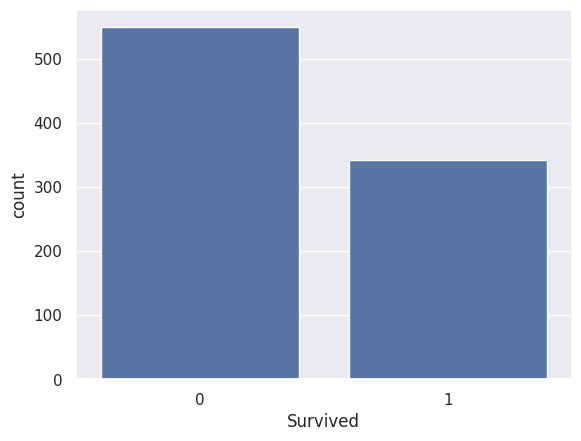

In [ ]:
# Count plot for Survived Column
sns.countplot(x='Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

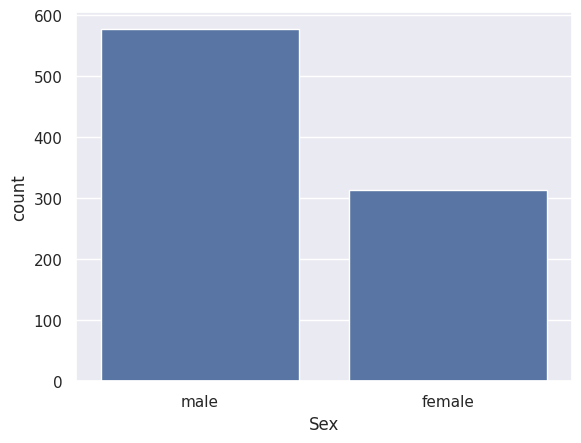

In [ ]:
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

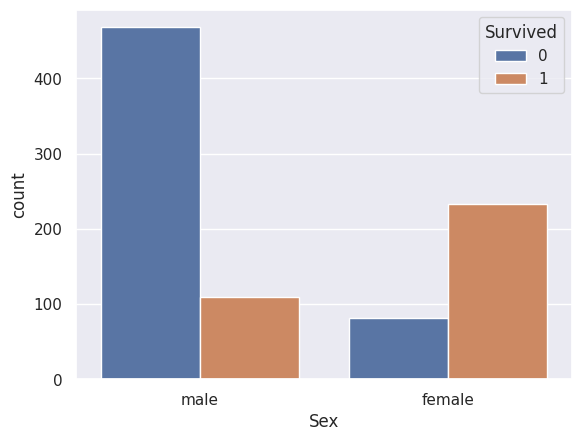

In [ ]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

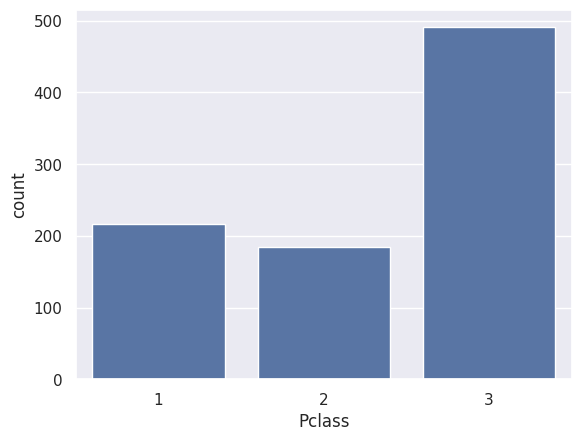

In [ ]:
# Creating a Count plot for Pclass Column
sns.countplot(x="Pclass", data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

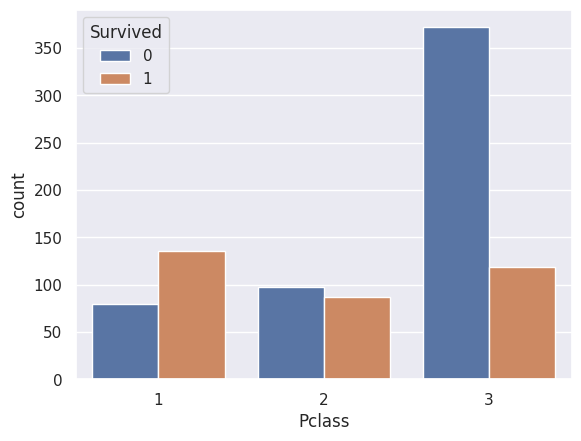

In [ ]:
# Number of Survivers by Pclass wise
sns.countplot(x="Pclass", hue="Survived", data=titanic_data)

 ### 4) Feature Engineering
 #### Encoding the Categorical Columns

In [ ]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic_data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# Converting Categorical Columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


 #### Feature Selection

In [ ]:
X = titanic_data.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### 5) Model Selection and Test

#### Training and Testing Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


#### Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### **Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model_prediction = model.predict(X_test)

In [ ]:
accuracy_score(model_prediction, Y_test)

0.7821229050279329

#### Model Evaluation

In [ ]:
confusion_matrix(Y_test, model_prediction)

array([[91,  9],
       [30, 49]])

#### Combining all the model score

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Score': [0.78]
})

results

,Model,Score
0,Logistic Regression,0.78


### 6) Model Prediction

In [ ]:
model_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

### 7) Model Building and Deployment

In [ ]:
# To save the model in a pkl file.

import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train.iloc[0,:]

Pclass       1.0000
Sex          0.0000
Age         40.0000
SibSp        0.0000
Parch        0.0000
Fare        27.7208
Embarked     1.0000
Name: 30, dtype: float64

In [ ]:
a = list(X_train.iloc[0,:])
a = np.array(a)

In [ ]:
ypred = model.predict(a.reshape(-1, 7))
ypred

array([0])

In [ ]:
Y_train[0]

0

#### Inference

In [ ]:
loaded_model = pkl.load(open('model.pkl', 'rb'))

In [ ]:
type(loaded_model)

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
ypred = loaded_model.predict(a.reshape(-1,7))

In [ ]:
print("Prediction, for sample passenger :", a, "\nSurvived :", ypred[0])

Prediction, for sample passenger : [ 1.      0.     40.      0.      0.     27.7208  1.    ] 
Survived : 0
